In [1]:
library(psych) #because of userfriendly use of varimax

Warning message:
"package 'psych' was built under R version 4.0.5"


# Download data

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_adapt = file.path(path_,'Adaptability')
path_model = file.path(path_adapt,'repeatability_model')
df = read.csv(file.path(path_adapt,'df_MVT_4individuality.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID) 
df$WIB = as.factor(df$WIB) 
df$TrackingSystemID = as.factor(df$TrackingSystemID) 
#mean-centering of the environmental variable so that intercepts reflect average values for the population and individuals
df$cDIB = as.integer(df$DIB) 
df$cDIBfact = as.factor(df$cDIB) 
df$RearingPenID = as.factor(df$RearingPenID) 
df$InitialWeight_kg = df$InitialWeight/1000
df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment) 
print(dim(df))
summary(df)

[1] 5361   30


 WIB         HenID           RPen            DIB          CLASS     
 2:333   hen_1  :  43   Min.   :1.000   Min.   :11.00   LEXP :1125  
 3:795   hen_105:  43   1st Qu.:2.000   1st Qu.:23.00   MEXP :1441  
 4:894   hen_110:  43   Median :2.000   Median :33.00   Other:2795  
 5:931   hen_113:  43   Mean   :2.474   Mean   :33.55               
 6:828   hen_114:  43   3rd Qu.:3.000   3rd Qu.:44.00               
 7:924   hen_116:  43   Max.   :4.000   Max.   :54.00               
 8:656   (Other):5103                                               
             TrackingSystemID     PenID      temperature_C_avg Treatment  
 TrackingSystem 10-12:2180    pen10  : 756   Min.   : 4.000    OFH :2629  
 TrackingSystem 3-5  :1806    pen11  : 756   1st Qu.: 8.667    TRAN:2732  
 TrackingSystem 8-9  :1375    pen8   : 688   Median :11.000               
                              pen9   : 687   Mean   :10.846               
                              pen12  : 668   3rd Qu.:12.667              

# PCA

In [3]:
#define var and scale them 
li_pca = c('perc_duration_5_Zone', 'perc_duration_4_Zone','perc_duration_3_Zone', 'perc_duration_2_Zone','perc_1_Zone_while_WG_open',
          'nbr_stays_2_Zone_perh', 'nbr_stays_4_Zone_perh','nbr_stays_3_Zone_perh', 'nbr_stays_5_Zone_perh','nbr_stays_1_Zone_perh',
          'in_WG_15mnAfterOpening','distribution_entropy', 'SleepingHeight','vertical_travel_distance_perh')
df[li_pca] = scale(df[li_pca])

In [4]:
#frst obs per week per individual
df_pca = df[df$tobeusedPCA==1,][li_pca]
head(df_pca,3)

,perc_duration_5_Zone,perc_duration_4_Zone,perc_duration_3_Zone,perc_duration_2_Zone,perc_1_Zone_while_WG_open,nbr_stays_2_Zone_perh,nbr_stays_4_Zone_perh,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,distribution_entropy,SleepingHeight,vertical_travel_distance_perh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.24395376,-0.776537409,1.6579902,1.242337,-0.6387372,-0.2837185,-0.5366171,-0.3928583,-0.4282676,-0.7573862,-0.5184839,-0.61358453,0.6092534,-0.5681994
4,-0.09783556,-0.907166454,-0.2255945,0.746534,-0.6387372,-0.5359577,-1.0720972,-0.7601437,-0.7402127,-0.7573862,-0.5184839,0.08326214,0.6092534,-0.9261056
10,-1.27670000,0.007236864,0.9798997,1.341497,-0.3365617,0.1863637,-0.1147237,0.4975308,-1.3641029,-0.1479979,-0.5184839,-0.22844770,-0.6621391,-0.1266268


In [5]:
#https://www.rdocumentation.org/packages/psych/versions/2.1.9/topics/principal
res = psych::principal(df_pca, rotate="none", nfactors=3, scores=TRUE) #not varimax (we want PC, and only one)
res

Principal Components Analysis
Call: psych::principal(r = df_pca, nfactors = 3, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.88  0.16  0.33 0.90 0.095 1.4
perc_duration_4_Zone           0.25  0.62  0.02 0.44 0.558 1.3
perc_duration_3_Zone           0.72 -0.22 -0.30 0.67 0.334 1.6
perc_duration_2_Zone           0.67 -0.30 -0.45 0.74 0.257 2.2
perc_1_Zone_while_WG_open      0.48 -0.36  0.68 0.83 0.174 2.4
nbr_stays_2_Zone_perh          0.90 -0.26 -0.01 0.87 0.128 1.2
nbr_stays_4_Zone_perh          0.47  0.81  0.15 0.90 0.103 1.7
nbr_stays_3_Zone_perh          0.92  0.12 -0.18 0.89 0.114 1.1
nbr_stays_5_Zone_perh          0.23  0.80  0.29 0.77 0.230 1.4
nbr_stays_1_Zone_perh          0.56 -0.36  0.64 0.86 0.144 2.6
in_WG_15mnAfterOpening         0.42 -0.31  0.51 0.54 0.464 2.6
distribution_entropy           0.83  0.15  0.10 0.71 0.288 1.1
S

In [6]:
#for validity compare with the one run on full dataset
res_validity = psych::principal(df[li_pca], rotate="none", nfactors=3, scores=TRUE) #not varimax (we want PC, and only one)
res_validity

Principal Components Analysis
Call: psych::principal(r = df[li_pca], nfactors = 3, rotate = "none", 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.88  0.24  0.28 0.90 0.095 1.4
perc_duration_4_Zone           0.20  0.64 -0.08 0.46 0.542 1.2
perc_duration_3_Zone           0.71 -0.32 -0.27 0.67 0.329 1.7
perc_duration_2_Zone           0.67 -0.36 -0.40 0.74 0.258 2.2
perc_1_Zone_while_WG_open      0.45 -0.17  0.75 0.80 0.204 1.8
nbr_stays_2_Zone_perh          0.89 -0.24  0.02 0.86 0.143 1.1
nbr_stays_4_Zone_perh          0.40  0.85 -0.01 0.88 0.116 1.4
nbr_stays_3_Zone_perh          0.90  0.10 -0.23 0.88 0.121 1.2
nbr_stays_5_Zone_perh          0.17  0.86  0.15 0.79 0.215 1.1
nbr_stays_1_Zone_perh          0.56 -0.19  0.68 0.82 0.182 2.1
in_WG_15mnAfterOpening         0.42 -0.14  0.60 0.56 0.438 1.9
distribution_entropy           0.80  0.16  0.15 0.68 0.

In [7]:
#documentation: The beta weights to find the principal components from the data
res$weights

,PC1,PC2,PC3
perc_duration_5_Zone,-0.14739734,0.06560681,0.182965501
perc_duration_4_Zone,0.04143685,0.25004289,0.012319379
perc_duration_3_Zone,0.12164124,-0.09069543,-0.167626121
perc_duration_2_Zone,0.11278537,-0.12033610,-0.250445924
perc_1_Zone_while_WG_open,0.08021676,-0.14721401,0.378395977
nbr_stays_2_Zone_perh,0.15059578,-0.10580214,-0.006143107
nbr_stays_4_Zone_perh,0.07882696,0.32808944,0.081422102
nbr_stays_3_Zone_perh,0.15384119,0.04868228,-0.100850216
nbr_stays_5_Zone_perh,0.03915879,0.32234504,0.159817438
nbr_stays_1_Zone_perh,0.09472404,-0.14761108,0.353057102


In [8]:
#eigenvalues of all components --> first one >1
res$values

[1] 5.9517669404 2.4668346840 1.8034562987 0.8995231460 0.8512642393
 [6] 0.5964026852 0.4950261510 0.3826373714 0.2045606484 0.1759675890
[11] 0.1492964893 0.0119279535 0.0111217395 0.0002140643

In [9]:
#https://www.rdocumentation.org/packages/psych/versions/2.1.6/topics/predict.psych
df_result = data.frame(predict(res, df[li_pca]))
df$PC1 = df_result$PC1
head(df,3)

,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,distribution_entropy,SleepingHeight,vertical_travel_distance_perh,cDIB,cDIBfact,InitialWeight_kg,PC1
,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>
1,2,hen_131,4,11,Other,TrackingSystem 10-12,pen10,11.50000,TRAN,1,...,-0.4282676,-0.7573862,-0.5184839,-0.6135845,0.6092534,-0.5681994,11,11,1.202,-0.02559792
2,2,hen_131,4,12,Other,TrackingSystem 10-12,pen10,10.16667,TRAN,0,...,-1.0521578,-0.7573862,-0.5184839,-0.6590702,0.6092534,-0.7727173,12,12,1.202,-0.12844268
3,2,hen_131,4,13,Other,TrackingSystem 10-12,pen10,9.00000,TRAN,0,...,-0.1163225,-0.7573862,-0.5184839,0.4832467,-1.9335317,-0.6193289,13,13,1.202,-0.23882933


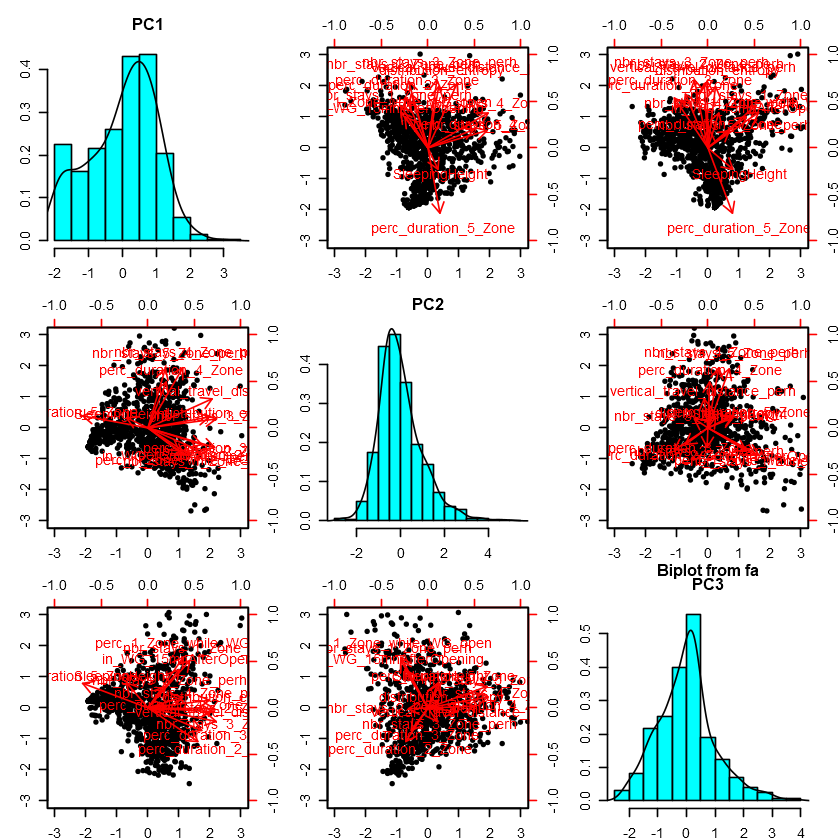

In [10]:
#documentation: https://www.rdocumentation.org/packages/psych/versions/2.0.9/topics/biplot.psych
biplot(res)

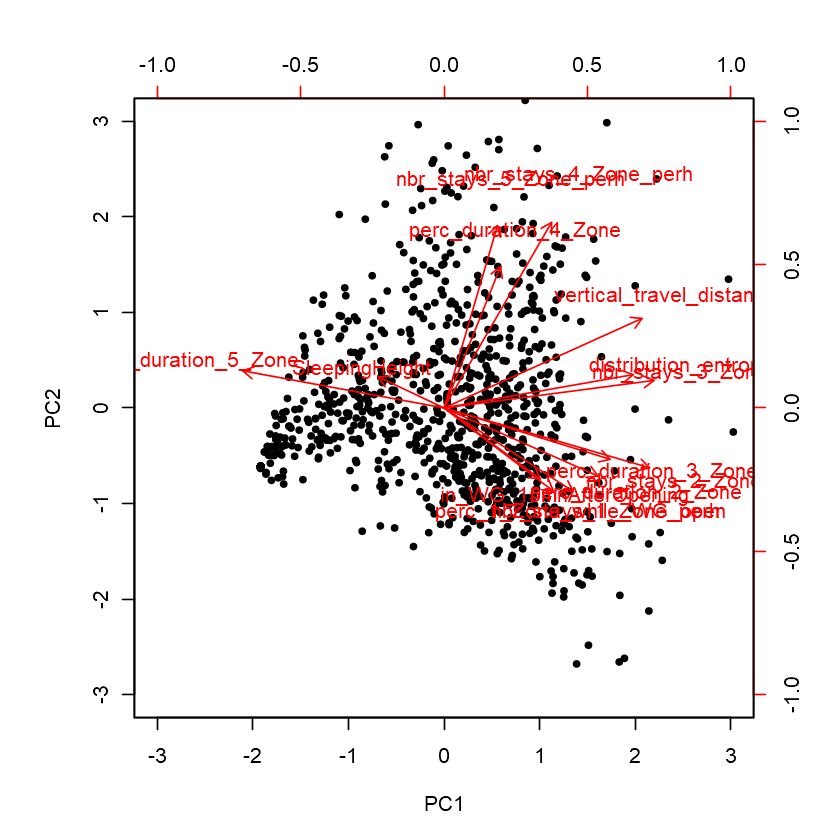

In [11]:
biplot(res, choose=c(1,2), main='')

In [12]:
jpeg("PCA.jpg")
biplot(res, choose=c(1,2), main='')
dev.off() 

png 
  2

In [13]:
write.csv(df, file.path(path_adapt,'df_MVT_4individuality_withPCA.csv'), row.names = FALSE)